<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/cnn/cnn_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN on (Fashion) MNIST using TF 2.0

In [1]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio
from IPython import display
import sklearn
from time import time

In [2]:

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. DNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

In [3]:
!git clone https://github.com/probml/pyprobml

Cloning into 'pyprobml'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 4299 (delta 1), reused 4 (delta 1), pack-reused 4291
Receiving objects: 100% (4299/4299), 166.78 MiB | 36.01 MiB/s, done.
Resolving deltas: 100% (2381/2381), done.


In [4]:
import pyprobml.scripts.mnist_helpers_tf as helper

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


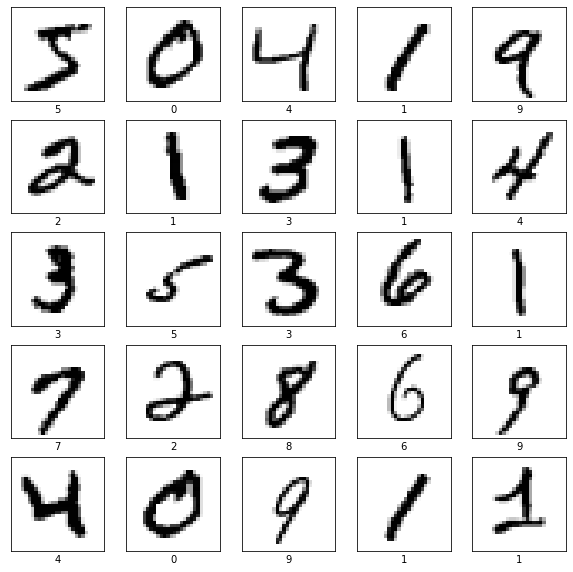

In [5]:
train_images, train_labels, test_images, test_labels, class_names=helper.get_dataset(FASHION=False)
print(train_images.shape)
helper.plot_dataset(train_images, train_labels, class_names)

In [6]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

epoch 0
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0469 - accuracy: 0.9852
time spent training 4.735
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9912
Train accuracy: 0.9912333488464355
313/313 [==============================] - 1s 2ms/step - loss: 0.0340 - accuracy: 0.9886
Test accuracy: 0.9886000156402588
(114,)


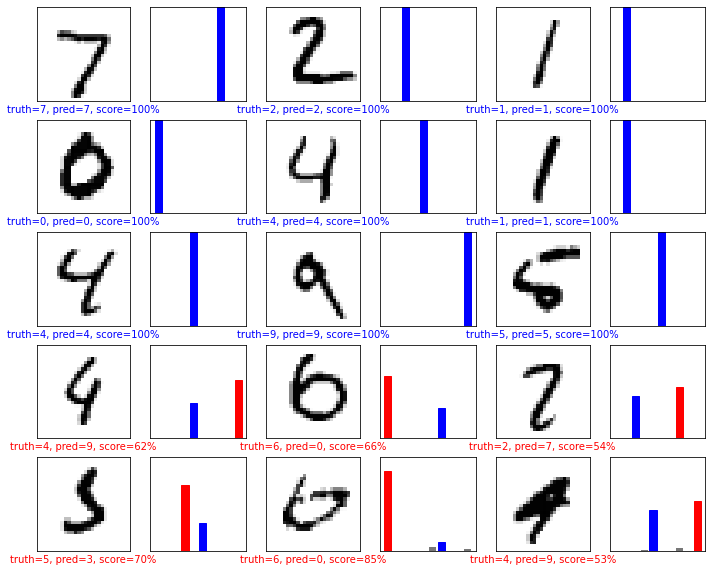

epoch 1
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0311 - accuracy: 0.9905
time spent training 4.505
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0243 - accuracy: 0.9926
Train accuracy: 0.9926166534423828
313/313 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9880
Test accuracy: 0.9879999756813049


<Figure size 432x288 with 0 Axes>

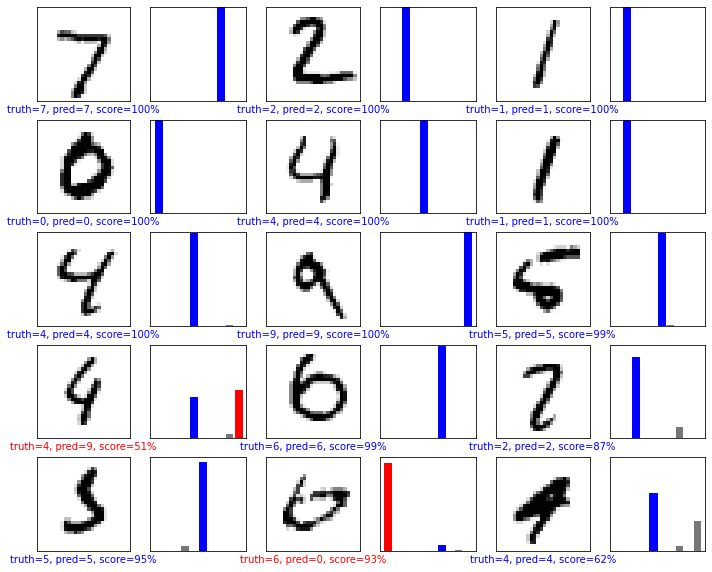

<Figure size 432x288 with 0 Axes>

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

for epoch in range(2):
  print(f'epoch {epoch}')
  time_start = time()
  model.fit(train_images, train_labels, epochs=1)
  print('time spent training {:0.3f}'.format(time() - time_start))

  train_loss, train_acc = model.evaluate(train_images, train_labels)
  print('Train accuracy:', train_acc)
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print('Test accuracy:', test_acc)

  predictions = model.predict(test_images)
  if epoch==0:
    ndx = helper.find_interesting_test_images(predictions, test_labels)
  helper.plot_interesting_test_results(test_images, test_labels, predictions, class_names, ndx)
  plt.suptitle(f'epoch {epoch}')